# Modules

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import missingno as msno

C:\Users\vikastiwari\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\vikastiwari\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\vikastiwari\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\vikastiwari\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\vikastiwari\AppData

In [2]:
air_data = pd.read_csv('./Data/Train/air_quality_training_data.csv')

In [3]:
air_data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [5]:
air_data.shape

(1600, 6)

## Checking the Count of Not Null Values

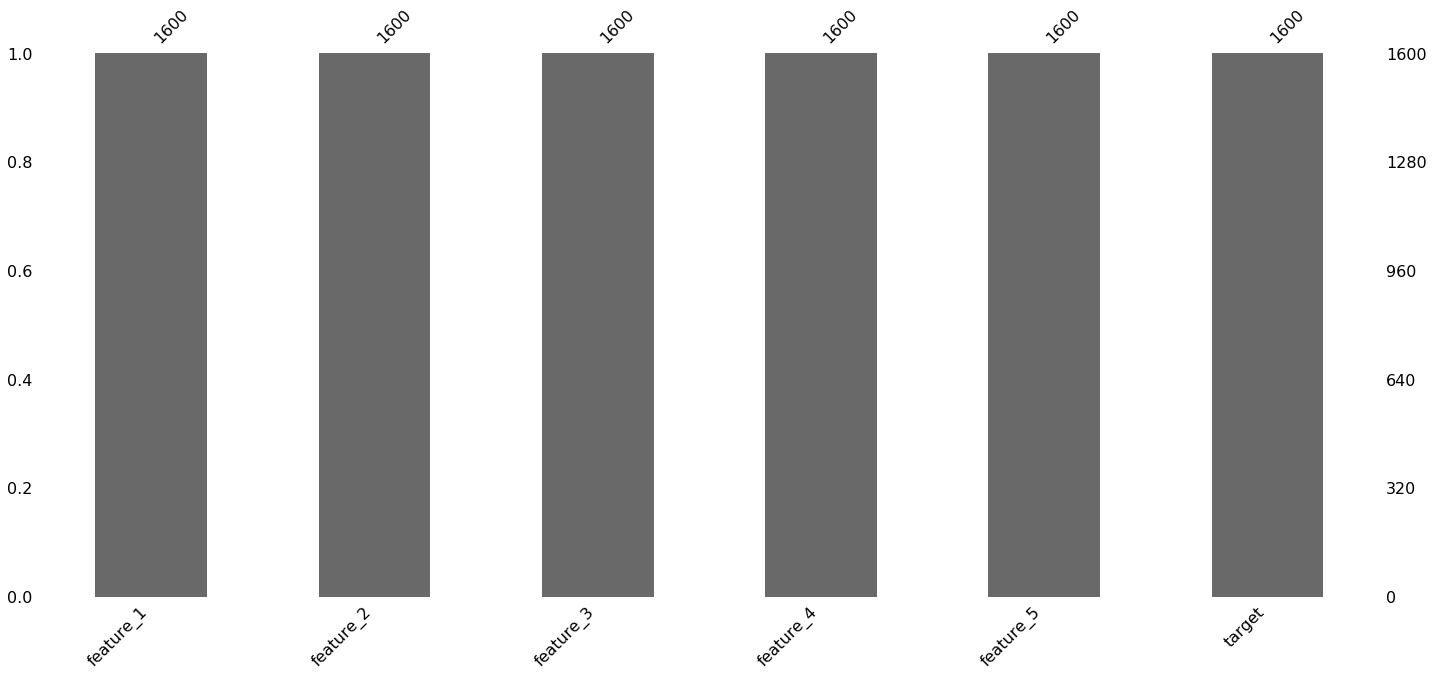

In [8]:
msno.bar(air_data)

## Correlation Matrix

In [38]:
air_data.corr()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
feature_1,1.000000,0.017356,-0.007307,-0.051649,-0.004005,0.260274
feature_2,0.017356,1.000000,-0.053230,-0.000601,0.001096,0.855356
feature_3,-0.007307,-0.053230,1.000000,-0.004463,-0.066958,0.024866
feature_4,-0.051649,-0.000601,-0.004463,1.000000,-0.005602,0.396420
feature_5,-0.004005,0.001096,-0.066958,-0.005602,1.000000,0.014760
target,0.260274,0.855356,0.024866,0.396420,0.014760,1.000000


## Features vs Labels

In [47]:
features = air_data[air_data.columns[:-1]]
labels = air_data['target']

## Train and Test Portions

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25)

In [50]:
print('X train shape ',X_train.shape)
print('X test shape ',X_test.shape)
print('y train shape ',y_train.shape)
print('y test shape ',y_test.shape)

X train shape  (1200, 5)
X test shape  (400, 5)
y train shape  (1200,)
y test shape  (400,)


# Training Models

In [71]:
score_of_models = {}

## Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
print('Predicted Target Values ',linear_regression.predict(X_test))

Predicted Target Values  [-4.37365743e+01  2.11573535e+01 -3.78361277e+00  6.41524482e+01
 -4.07656536e+01 -1.53224914e+02  6.47046344e+00  1.48495541e+02
 -2.65455415e+01  2.48223593e+01  2.97090691e+01 -7.42861013e+01
  7.32148375e+00  2.54557243e+02  1.69545884e+02  8.17049762e+01
 -1.69107832e+01  1.68064116e+02  3.94414877e+01 -7.63642710e-01
  8.12791460e+01  1.76599186e+02  1.91760987e+02 -8.48304796e+01
  9.16683083e+01 -1.15424550e+00 -1.44346931e+02  1.14049899e+01
  2.30929067e+02 -1.85259882e+02  5.65697239e+01 -8.09474813e+01
 -1.04494903e+02 -1.01069660e+01  5.20000886e+01 -3.09821682e+01
  2.91014916e+02 -1.11193466e+01 -1.03700898e+02 -1.37614726e+02
 -8.76317560e+01  1.30619116e+02  2.66590053e+02  1.34876017e+01
  1.27907298e+02  8.70104935e+01 -1.22374764e+02  4.86807248e+01
 -3.08274607e+01 -1.32723384e+02 -7.16498012e+01  2.15060962e+02
  1.00706421e+02 -1.23316238e+02 -1.88848776e+02  1.24391332e+02
 -3.25415803e+01  3.38880728e+01 -7.90728830e+00 -1.61725948e+02


In [72]:
linear_regression_score = linear_regression.score(X_test,y_test)
print('R^2 Score for Linear Regression : ', linear_regression_score)
score_of_models['LinearRegression'] = linear_regression_score

R^2 Score for Linear Regression :  0.9684696784694126


## Support Vector Regression

In [56]:
from sklearn.svm import SVR

In [69]:
svr_rbf = SVR(kernel = 'rbf', C=1e3, gamma=0.1)
svr_rbf.fit(X_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [73]:
svr_score = svr_rbf.score(X_test,y_test)
print('R^2 score for  SVR : ', svr_score)
score_of_models['SVR'] = svr_score

R^2 score for  SVR :  0.9623130205374784


## Decision Tree Regression

In [75]:
from sklearn.tree import DecisionTreeRegressor

In [94]:
dtr_model = DecisionTreeRegressor(max_leaf_nodes=1000, max_depth=10)
dtr_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
                      max_leaf_nodes=1000, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [95]:
dtr_score = dtr_model.score(X_test, y_test)
print('R^2 Score for DecisionTreeRegressor : ',dtr_score)
score_of_models['DecisionTreeRegressor'] = dtr_score

R^2 Score for DecisionTreeRegressor :  0.8961871015944072


## RandomForestRegressor

In [96]:
from sklearn.ensemble import RandomForestRegressor

In [114]:
rfr_model = RandomForestRegressor(max_leaf_nodes=1000, max_depth=100)
rfr_model.fit(X_train,y_train)

C:\Users\vikastiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
                      max_features='auto', max_leaf_nodes=1000,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [115]:
rfr_score = rfr_model.score(X_test,y_test)
print('RandomForestRegressor Score : ',rfr_score)
score_of_models['RandomForestRegressor'] = rfr_score

RandomForestRegressor Score :  0.9348039002279319


# Score of Models

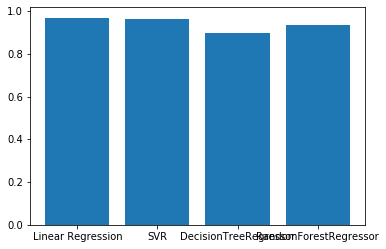

In [126]:
plt.bar(range(len(score_of_models)), list(score_of_models.values()), align='center')
plt.xticks(range(len(score_of_models)),list(score_of_models.keys()))
plt.show()

# Predicting Air Quality for Test Data

In [128]:
test_data = pd.read_csv('./Data/Test/air_quality_test_data.csv')

In [136]:
predicted_air_quality = linear_regression.predict(test_data)

In [140]:
df = pd.DataFrame({'Id':range(predicted_air_quality.shape[0]),'target':predicted_air_quality})

In [143]:
df.to_csv('air_quality_prediction.csv', index=False)